# Análisis de modelos de dron

Se analizarán los diferentes modelos y sus características, además de proponer un balance de datos.

In [ ]:
#IMPORTS

from cmath import nan
import math
import time
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#PATHS

mypath= r"/content/drive/MyDrive/TFG/"
outputPath = r"/content/drive/MyDrive/TFG/Preprocessed/"
otherPath = r"/content/drive/MyDrive/TFG Celia/Código/Ejemplos/Listas_modelos/"


# Análisis de la clase: modelo de dron

En el script se obtiene el modelo como una columna, se busca tener clases balanceadas así que se necesita ver la cantidad de cada modelo.


De los archivos procesados, se analizarán y se mostrará una lista de los más abundantes, para realizar un posterior balanceado.

drone_model

* 4011            Quadrotor x - DJI F450 w/ DJI ESCs

* 4001            Quadrotor x - generic quadricopter

* 10016           Quadrotor Wide - 3DR Iris Quadrotor

* 4010            Quadrotor x - DJI F330 w/ DJI ESCs

* 1001            Simulation (Copter) - HIL Quadcopter X 

* 6001            Hexarotor x - Generic Hexarotor x geometry 

* 4014            Quadrotor x - S500 Generic 

* 1040            Standard VTOL

* 13244           VTOL - Tiltrotor VTOL

* 4002            Quadrotor x - Generic Quadrotor x with mount (e.g. gimbal)

* 4070            Quadrotor x - Intel Aero Ready to Fly Drone

* 1100            Simulation (Copter) - SIH Quadcopter X 

* 12001           Octorotor coaxial - Generic 10" Octo coaxial geometry 

* 1030            Fixed Wing

* 6021            Hexarotor - Yuneec H520

* 1041            Quadrotor VTOL (Tailsitter)

* 13006           Standard VTOL - Generic quad delta VTOL



In [ ]:
model_list = pd.DataFrame() #CLEAN DF


#Se analizan los modelos de la lista generada anteriormente por el script print_drone_model. En este caso concatena varias listas
for f in listdir(otherPath): 
  if isfile(join(otherPath, f)):
    model_list1 = pd.read_csv(otherPath+str(f),sep=',')
    model_list = pd.concat([model_list,model_list1])

model_list.drop_duplicates()

#Dataframe raw
pd.set_option('max_rows', len(model_list)) #To see the whole dataframe
model_list=model_list[model_list['drone_model'] != 1060]
model_list=model_list[model_list['drone_model'] != 4001]

list5=model_list['drone_model'].value_counts().iloc[0:7] # 7 modelos más frecuentes
list1=model_list.loc[model_list['drone_model'] == 12001]
list2=model_list.loc[model_list['drone_model'] == 2100]
list3=model_list.loc[model_list['drone_model'] == 1030]
#list6=model_list.loc[model_list['drone_model'] == 10016]
#list8=model_list.loc[model_list['drone_model'] == 1040]
#list7=model_list.loc[model_list['drone_model'] == 6001]
list4=pd.concat([list1['drone_model'].value_counts(),list2['drone_model'].value_counts(),list3['drone_model'].value_counts()])

In [ ]:
model_list=pd.concat([model_list,list4])

In [ ]:
#Gets the name of a drone model given its code
#PARAMETERS: float
#RETURNS string with the name of the drone model
def get_name(f):
  list_class = [1030, 2100, 12001, 10016, 6001,1041,4011,4001,4010,1040,1100]
  list_names= ['Generic Fixed wing','Standard Plane','Generic 10" Octorotor Coaxial','3DR Iris Quadrotor','Generic Hexarotor X','Quadrotor VTOL (Tailsitter)','DJI F450 Quadcopter','Generic Quadcopter X','DJI F330','Standard VTOL','Simulation SIH Quadcopter X']
  return list_names[list_class.index(f)]

['3DR Iris Quadrotor', 'DJI F450 Quadcopter', 'Standard VTOL', 'Quadrotor VTOL (Tailsitter)', 'Simulation SIH Quadcopter X', 'Generic Hexarotor X', 'DJI F330', 'Generic 10" Octorotor Coaxial', 'Standard Plane', 'Generic Fixed wing']
Int64Index([10016, 4011, 1040, 1041, 1100, 6001, 4010, 12001, 2100, 1030], dtype='int64')


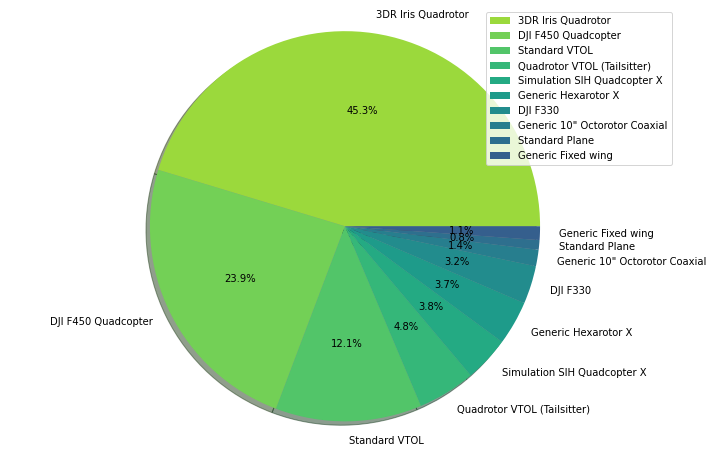

In [ ]:
#Para construir un pie chart con una selección de modelos de dron y sus nombres

import matplotlib.pyplot as plt

model_list=model_list.drop_duplicates(subset=['id'], keep='first')
model_list=model_list[model_list['drone_model'] != 1060]

counts= model_list['drone_model'].value_counts().iloc[0:7]
counts=pd.concat([counts,list4])

#names = counts.index
#counts.drop_duplicates()
#names = [get_name(i) for i in counts.index]
classes= [get_name(i) for i in counts.index]
print(classes)

colors = plt.get_cmap('viridis')(np.linspace(0.85, 0.3, len(counts.index)))
fig, ax = plt.subplots(figsize=(12,8))

print(counts.index)

ax.pie(counts,colors=colors,labels=classes, autopct='%1.1f%%',shadow=True, startangle=0)

ax.axis('equal')
plt.legend()
#plt.show()

# counts_f=counts.to_frame()
# #labels =['10016,4011,4001,1040,1060,1041,1100,6001,4010,4014,1001,4002,4031,12001,4070,1030,1015,13244,4009,4957']
# counts_f.iplot(kind='pie',labels=['drone_model'],values='drone_model', textinfo="percent+label", title='Top Drone Models', hole = 0.4)

# image_name='pie_final1_leg'
# plt.savefig('/content/drive/MyDrive/TFG Celia/Código/Resultados/Figuras/'+image_name+'.svg')
# plt.savefig('/content/drive/MyDrive/TFG Celia/Código/Resultados/Figuras/'+image_name+'.png')

##Descripción y características de cada modelo

ESC: Electronic Speed Controller (https://www.dji.com/newsroom/news/inside-a-drone-esc)

Vertical Take off and Landing: Son drones de ala fija con varios rotores que despegan y aterrizan de forma vertical.

Tailsitter(asistente de cola): son VTOLs que despegan y aterrizan sobre su cola, pero vuelan horizontalmente. 

Quadrotor: 4 rotores
  * X
  * Wide

Hexarotor: 6 rotores

Octorotor: 8 rotores

* 4011            Quadrotor x - DJI F450 w/ DJI ESCs

* 4001            Quadrotor x - generic quadricopter

* 10016           Quadrotor Wide - 3DR Iris Quadrotor

* 4010            Quadrotor x - DJI F330 w/ DJI ESCs

* 1001            Simulation (Copter) - HIL Quadcopter X 

* 6001            Hexarotor x - Generic Hexarotor x geometry 

* 4014            Quadrotor x - S500 Generic 

* 1040            Standard VTOL

* 13244           VTOL - Tiltrotor VTOL

* 4002            Quadrotor x - Generic Quadrotor x with mount (e.g. gimbal)

* 4070            Quadrotor x - Intel Aero Ready to Fly Drone

* 1100            Simulation (Copter) - SIH Quadcopter X 

* 12001           Octorotor coaxial - Generic 10" Octo coaxial geometry 

* 1030            Fixed Wing

* 6021            Hexarotor - Yuneec H520

* 1041            Quadrotor VTOL (Tailsitter)

* 13006           Standard VTOL - Generic quad delta VTOL
